* Dataset: https://www.kaggle.com/datasets/shree1992/housedata
* Trained Model: https://house-prediction-in-washington.herokuapp.com/
* Application Docs: https://github.com/zulfijauh/Data-Science/tree/main/Price%20Prediction%20Deployment

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Data Understanding

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/zulfijauh/Data-Science/main/Dataset/House%20price%20prediction.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Check null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Check Data Statistic
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Cleaning

In [ ]:
# Round value of bedrooms, bathrooms and price
data['bedrooms'] = data['bedrooms'].round().astype(int)
data['bathrooms'] = data['bathrooms'].round().astype(int)
data['price'] = data['price'].round(decimals=2)
# Change variable datatype
data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True).astype(int)

In [ ]:
# Check unique value for country. This variable only contain 1 values. This variable is ok to drop
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

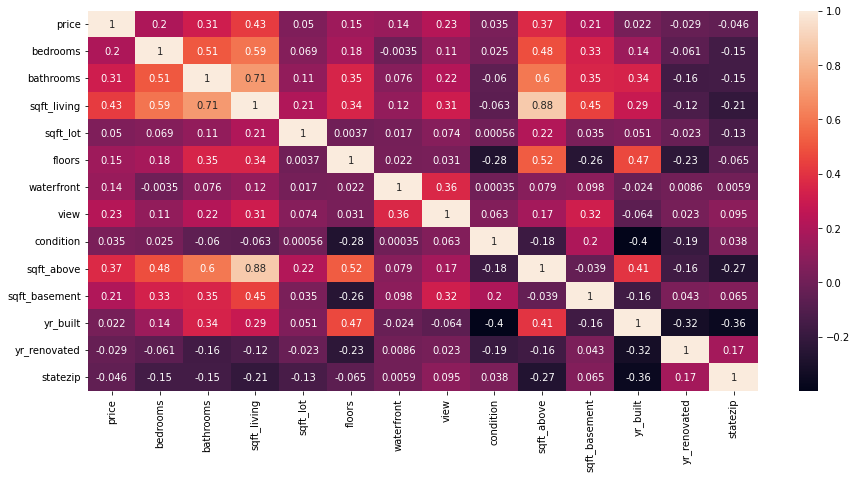

In [ ]:
# Check the correlation to price. Negative correlation is ok to drop
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

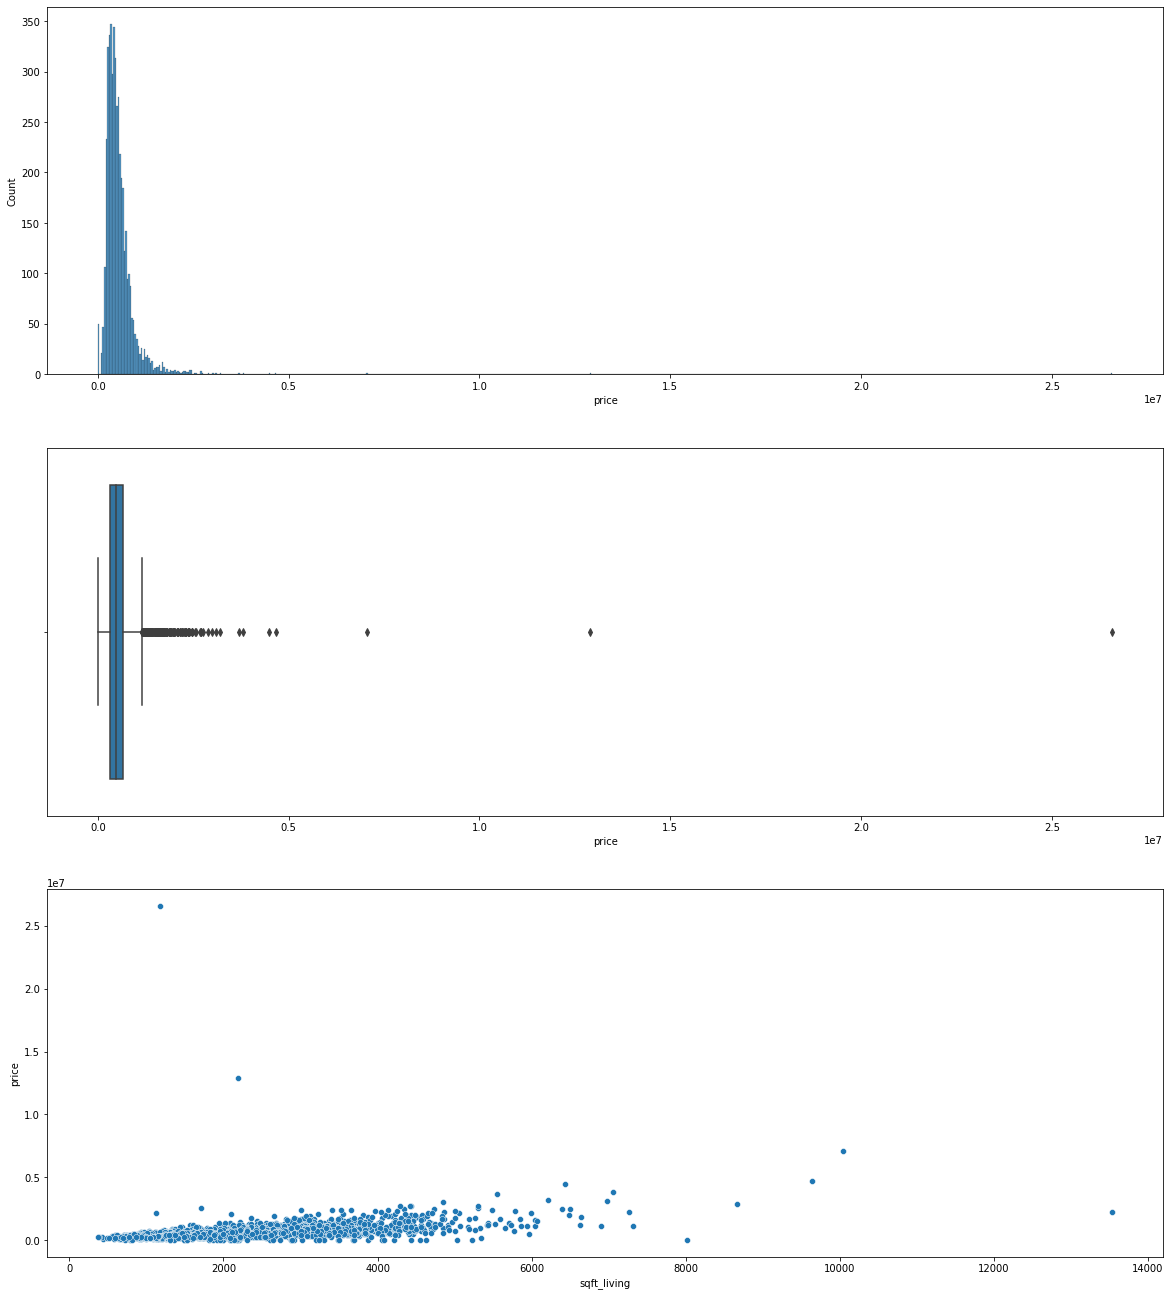

In [ ]:
# Data spread by Price

f,ax = plt.subplots(3,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])

In [ ]:
# Data with inconsistent values
data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3,2,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,98001,USA
4356,2014-05-05 00:00:00,0.0,4,3,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,98199,USA
4357,2014-05-05 00:00:00,0.0,6,3,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,98146,USA
4358,2014-05-06 00:00:00,0.0,5,4,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,98075,USA
4361,2014-05-07 00:00:00,0.0,5,2,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,98166,USA


In [ ]:
# Data with inconsistent values
data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [ ]:
# Check houses the outliers (most expensive)
data.sort_values(by=['price'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3,2,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
4346,2014-06-23 00:00:00,12899000.0,3,2,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
2286,2014-06-11 00:00:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2761,2014-06-18 00:00:00,4489000.0,4,3,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,98004,USA


In [ ]:
# Comparing feature of the most expensive price with the same house in their neighborhood 
data.loc[(data['statezip']== 98031)].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3,2,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
1152,2014-05-22 00:00:00,430000.0,4,3,3220,8936,2.0,0,0,3,2450,770,1990,2009,20301 96th Ave S,Kent,98031,USA
3580,2014-06-27 00:00:00,399950.0,3,2,2570,10431,2.0,0,0,3,2570,0,1989,0,9531 S 204th Pl,Kent,98031,USA


In [ ]:
# Comparing feature of 2nd most expensive price with the same house in their neighborhood
data.loc[(data['statezip']==98199)].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4346,2014-06-23 00:00:00,12899000.00,3,2,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
4465,2014-06-05 00:00:00,2560498.33,3,2,1710,1664,2.0,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,98199,USA
1355,2014-05-27 00:00:00,1655000.00,4,4,3080,4815,2.0,0,3,3,2300,780,1937,2009,2441-2499 Crane Dr W,Seattle,98199,USA


In [ ]:
# Check houses the outliers (cheapest)
data.loc[(data['price'] > 0)].sort_values(by=['price']).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,2014-05-06 00:00:00,7800.0,2,1,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,98168,USA
1219,2014-05-23 00:00:00,80000.0,1,1,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,98014,USA
1587,2014-05-29 00:00:00,83000.0,2,1,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,98168,USA
4407,2014-05-20 00:00:00,83300.0,3,2,1490,7770,1.0,0,0,4,1490,0,1990,0,26017 189th Ave SE,Covington,98042,USA
4415,2014-05-23 00:00:00,83300.0,3,2,1370,78408,1.0,0,0,5,1370,0,1964,0,24007 196th Ave SE,Covington,98042,USA


In [ ]:
# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_living'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05 00:00:00,2280000.0,7,8,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,98053,USA
2286,2014-06-11 00:00:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA


In [ ]:
# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bedrooms'] == 0)])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Insert index of outliers.
missing_index_list.extend([4351,4346,4350,122])
# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

# Preparation

In [ ]:
# Split data to X for variable input, and y for target class
X = data.drop(['date','street','country','price'],axis=1)
y = data['price']

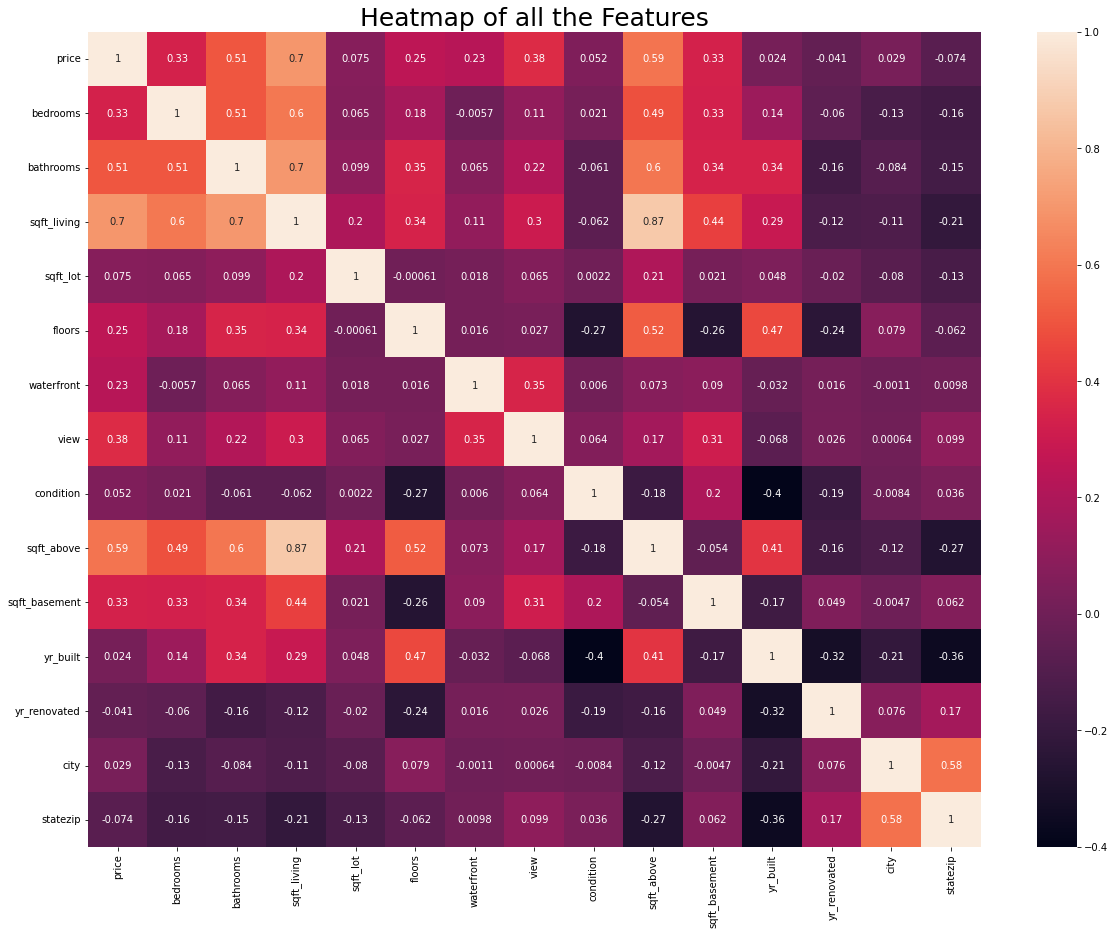

In [ ]:
encoder = LabelEncoder()


X['city'] = encoder.fit_transform(X['city'])

plt.figure(figsize=(20,15))
sns.heatmap(pd.concat([y,X], axis=1).corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 25);
plt.show()

# Create Pipeline

In [ ]:
#data.drop(['date','yr_renovated','country','street','statezip'],axis=1).to_csv('house_clean', encoding='utf-8', index=False)

In [ ]:
# Split data to X for variable input, and y for target class
X = data.drop(['date','yr_renovated','country','price','street','statezip'],axis=1)
y = data['price']

encoder = LabelEncoder()
X['city'] = encoder.fit_transform(X['city'])

nums = X.select_dtypes(include=['int64', 'float64']).columns
cats = X.select_dtypes(include=['object','bool']).columns
#cats = list(features.values)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('imput', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, nums),
                                               ('cat', categorical_transformer, cats)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                ('regressor', MLPRegressor(hidden_layer_sizes=(2,100) ,max_iter=600))])

pipeline = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

## Model Performance

In [ ]:
print('-------------------------')
print('coef of determination training ', pipeline.score(X_train, y_train))
print('coef of determination testing ', pipeline.score(X_test, y_test))
#print('coefficient')
#print(pipeline.coef_)
#print('intercept')
#print(pipeline.intercept_)
print()
print('prediction')
y_pred = pipeline.predict(X_test)
print(y_pred[:10])
print()
print('real value')
print(np.array(y_test[0:10]))
print()
mae = pipeline.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, mae))

-------------------------
coef of determination training  0.8756865768122031
coef of determination testing  0.5965173343194842

prediction
[ 424305.241628   1259293.47103533  287845.92512056  315485.89106922
  307847.94307163  359740.53949024 1171058.02359679  573000.0904784
  885878.52996203  346297.85909682]

real value
[ 395000. 1505000.   83000.  262500.  289950.  430000.  599999.  600000.
  975000.  353250.]

Mean Absolute Error:  88131.3400507796


## Test to New Data

In [ ]:
# Check columns
pd.concat([y,X], axis=1).columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'city'],
      dtype='object')

In [ ]:
# Check unique values
col_cat = ['city']
col_num = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition',
       'yr_built']
for i in range(len(col_cat)):
  print(col_cat[i], ' = ' , data[col_cat[i]].sort_values().unique())       
for i in range(len(col_num)):
  print(col_num[i], ' = ' , X[col_num[i]].sort_values().unique())

city  =  ['Algona' 'Auburn' 'Beaux Arts Village' 'Bellevue' 'Black Diamond'
 'Bothell' 'Burien' 'Carnation' 'Clyde Hill' 'Covington' 'Des Moines'
 'Duvall' 'Enumclaw' 'Fall City' 'Federal Way' 'Inglewood-Finn Hill'
 'Issaquah' 'Kenmore' 'Kent' 'Kirkland' 'Lake Forest Park' 'Maple Valley'
 'Medina' 'Mercer Island' 'Milton' 'Newcastle' 'Normandy Park'
 'North Bend' 'Pacific' 'Preston' 'Ravensdale' 'Redmond' 'Renton'
 'Sammamish' 'SeaTac' 'Seattle' 'Shoreline' 'Skykomish' 'Snoqualmie'
 'Snoqualmie Pass' 'Tukwila' 'Vashon' 'Woodinville' 'Yarrow Point']
bedrooms  =  [1 2 3 4 5 6 7 8 9]
bathrooms  =  [1 2 3 4 5 6 7]
floors  =  [1.  1.5 2.  2.5 3.  3.5]
waterfront  =  [0 1]
view  =  [0 1 2 3 4]
condition  =  [1 2 3 4 5]
yr_built  =  [1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 

In [ ]:
new_data = [{'bedrooms':3, 'bathrooms':2, 'sqft_living':3000, 'sqft_lot':10000, 'floors':2,
       'waterfront':0, 'view':4, 'condition':4, 'sqft_above':1500, 'sqft_basement':0,
       'yr_built':2010, 'city':35}]

new_df = pd.DataFrame(new_data)

for i in new_df.reset_index()['index']:
  print('Price of house', i+1, ': $', float(pipeline.predict(new_df[i:i+1])))

Price of house 1 : $ 584467.4437412841



## Save Model

In [ ]:
import joblib

# Split data to X for variable input, and y for target class
X = data.drop(['date','yr_renovated','country','price','street','statezip'],axis=1)
y = data['price']

encoder = LabelEncoder()
X['city'] = encoder.fit_transform(X['city'])

nums = X.select_dtypes(include=['int64', 'float64']).columns
cats = X.select_dtypes(include=['object','bool']).columns
#cats = list(features.values)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('imput', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, nums),
                                               ('cat', categorical_transformer, cats)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                ('regressor', RandomForestRegressor(max_depth=10))])

pipeline = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

filename = '/content/drive/MyDrive/Achievements/Machine Learning Deployment/house_prediction_trained_model.pkl'
joblib.dump(pipeline, filename)

['/content/drive/MyDrive/Achievements/Machine Learning Deployment/house_prediction_trained_model.pkl']

# Test Loaded Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
filename = '/content/drive/MyDrive/Achievements/Machine Learning Deployment/house_prediction_trained_model.pkl'
loaded_model = joblib.load(filename)

load_data = [{'bedrooms':3, 'bathrooms':2, 'sqft_living':3000, 'sqft_lot':10000, 'floors':2,
       'waterfront':0, 'view':4, 'condition':4, 'sqft_above':1500, 'sqft_basement':0,
       'yr_built':2010, 'city':35}]

load_df = pd.DataFrame(load_data, index=[0])
result = loaded_model.predict(load_df)
print("House Price: $",float(result))

House Price: $ 1106022.7972559445
